In [1]:
current_job_id = '019'
#Try new generator
checkpoint_name = 'weights.{epoch:03d}-{val_loss:.2f}.hdf5'
filepath = 'saved_models/'
epochs_n = 200
batch_size = 256

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD, Nadam

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


Using MXNet backend


Shape of training dataset : (50000, 3, 32, 32)
Shape of testing dataste : (10000, 3, 32, 32)


In [3]:
rglrzr = regularizers.l2(0.001)
drop_out = 0.35

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:], kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_out))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_out))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_out))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_out))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(drop_out))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(drop_out))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=rglrzr))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_out))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(drop_out))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(drop_out))
model.add(Dense(10))
model.add(Activation('softmax'))


sgd = SGD(lr=0.015, momentum=0.9, nesterov=True)
#nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False  # randomly flip images
    )


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)



#add some callbacks:
callbacks = []

checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath+current_job_id+checkpoint_name, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto')
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

#callbacks.append(checkpoint)
callbacks.append(reduce_lr)
callbacks.append(early_stopping)

In [4]:
# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size), 
                              epochs=epochs_n,
                              validation_data=(x_test,y_test),
                              callbacks = callbacks)

Epoch 1/200


/home/shiqidai1002/anaconda3/lib/python3.7/site-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.00390625). Is this intended?
  force_init=force_init)


196/196 [==============================] - 20s 102ms/step - loss: 4.1366 - acc: 0.1828 - val_loss: 4.0394 - val_acc: 0.2081
Epoch 2/200
196/196 [==============================] - 15s 79ms/step - loss: 3.7598 - acc: 0.2745 - val_loss: 3.5988 - val_acc: 0.2990
Epoch 3/200
196/196 [==============================] - 15s 79ms/step - loss: 3.4142 - acc: 0.3340 - val_loss: 3.2995 - val_acc: 0.3559
Epoch 4/200
196/196 [==============================] - 15s 79ms/step - loss: 3.1095 - acc: 0.3892 - val_loss: 3.1131 - val_acc: 0.3556
Epoch 5/200
196/196 [==============================] - 15s 78ms/step - loss: 2.8315 - acc: 0.4470 - val_loss: 2.8094 - val_acc: 0.4276
Epoch 6/200
196/196 [==============================] - 15s 79ms/step - loss: 2.5808 - acc: 0.4984 - val_loss: 2.6456 - val_acc: 0.4576
Epoch 7/200
196/196 [==============================] - 16s 79ms/step - loss: 2.3532 - acc: 0.5498 - val_loss: 2.5189 - val_acc: 0.4688
Epoch 8/200
196/196 [==============================] - 16s 80ms/st

196/196 [==============================] - 15s 78ms/step - loss: 0.5796 - acc: 0.9123 - val_loss: 0.6562 - val_acc: 0.8928
Epoch 62/200
196/196 [==============================] - 15s 79ms/step - loss: 0.5819 - acc: 0.9122 - val_loss: 0.6593 - val_acc: 0.8927
Epoch 63/200
196/196 [==============================] - 15s 78ms/step - loss: 0.5761 - acc: 0.9139 - val_loss: 0.6549 - val_acc: 0.8929
Epoch 64/200
196/196 [==============================] - 15s 78ms/step - loss: 0.5770 - acc: 0.9147 - val_loss: 0.6559 - val_acc: 0.8927
Epoch 65/200
196/196 [==============================] - 15s 78ms/step - loss: 0.5745 - acc: 0.9145 - val_loss: 0.6562 - val_acc: 0.8929
Epoch 66/200
196/196 [==============================] - 15s 78ms/step - loss: 0.5768 - acc: 0.9143 - val_loss: 0.6552 - val_acc: 0.8922
Epoch 67/200
196/196 [==============================] - 15s 78ms/step - loss: 0.5778 - acc: 0.9131 - val_loss: 0.6552 - val_acc: 0.8919
Epoch 68/200
196/196 [==============================] - 16s 8

10000/10000 [==============================] - 4s 364us/step
[0.6531756416320801, 0.8922]


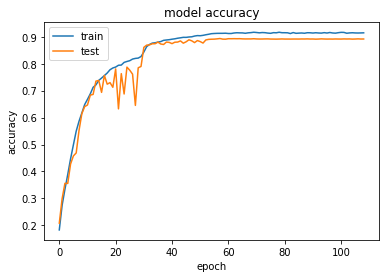

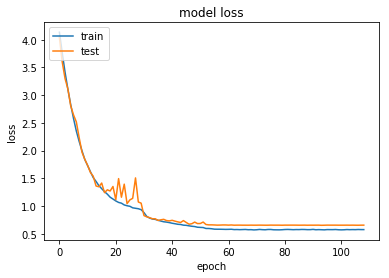

In [5]:
score = model.evaluate(x=x_test,y=y_test)
print(score)

model.save(filepath + current_job_id)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()